In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants as const
from causticpy import *

In [2]:
g_2 = pd.read_csv('g_2.csv')
g_s = pd.read_csv('g_s.csv')

In [3]:
display(g_2.head())
display(g_s.head())

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,RAJ2000_y,DEJ2000_y,z_y,...,logLobs,logMtot,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot
0,15983,1069,02570921+0519153,44.288391,5.32091,0.024036,11.04765,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
1,41930,1069,02533752+0603392,43.406349,6.06101,0.024890,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
2,34664,1069,02574211+0525562,44.425579,5.43222,0.024612,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
3,35170,1069,02574458+0540192,44.435841,5.67208,0.023848,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
4,42129,1069,02575838+0546592,44.493309,5.78307,0.019647,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32


,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,logMtot,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot,Dist_y
0,151723,82182,1237661121851687040,50.787243,40.294140,0.014498,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
1,148781,82182,1237661121851687044,50.792912,40.299427,0.013492,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
2,151724,82182,1237661121851687072,50.852291,40.355141,0.016187,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
3,149988,82182,1237661083199734382,50.953522,40.557800,0.017263,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
4,144611,82182,1237661059574858087,51.166824,40.814262,0.017700,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,


In [4]:
def tan_angle(data):
    delta1 = np.deg2rad(data['DEJ2000_x'])
    alpha1 = np.deg2rad(data['RAJ2000_x'])
    delta0 = np.deg2rad(data['DEJ2000_y'])
    alpha0 = np.deg2rad(data['RAJ2000_y'])
    x1 = np.cos(delta1)*np.cos(alpha1)
    y1 = np.cos(delta1)*np.sin(alpha1)
    z1 = np.sin(delta1)
    x0 = np.cos(delta0)*np.cos(alpha0)
    y0 = np.cos(delta0)*np.sin(alpha0)
    z0 = np.sin(delta0)
    cos_hamma = (x0*x1 + y0*y1+z0*z1)
    sin_hamma = np.sqrt(1-cos_hamma**2)
    tan_hamma = sin_hamma / cos_hamma
    return tan_hamma

In [5]:
g_2['dist'] = g_2.DL*tan_angle(g_2)
g_s['dist'] = g_s.DL*tan_angle(g_s)

In [6]:
g_2['v'] = const.c.to('km / s')*(g_2.z_x - g_2.z_y)/(1+g_2.z_x)
g_s['v'] = const.c.to('km / s')*(g_s.z_x - g_s.z_y)/(1+g_s.z_x)

In [18]:
def drawPlot(data, GrID, ax, c):
    gr = data[data.iGrID == GrID]
    ac = Caustic()
    as_good_flag = ac.run_caustic(np.array(gr[gr.columns.tolist()[3:6]]))
    x_range, caustic_profile = ac.x_range, ac.caustic_profile
    ax.plot(x_range, caustic_profile, c='b')
    ax.plot(x_range, -caustic_profile, c='b')
    ax.scatter(gr.dist, gr.v, c=c, marker='x')
    ax.set_xlabel('projection distance from center')
    ax.set_ylabel('velocity')
    ax.set_title('iGrID = %d' % (GrID))
    lim = max(max(gr.v), -min(gr.v), max(caustic_profile))
    ax.set_ylim(top=lim+200, bottom=-lim-200)
    ax.set_xlim(right=max(gr.dist)+1)

DATA SET SIZE 32
Pre_r200= 0.818300730441131
Calculating Density w/Mirrored Data
Vdisp from galaxies= 487.86696477949226
Combined Vdisp= 487.86696477949226
Calculating initial surface
complete
DATA SET SIZE 98
Pre_r200= 1.4753221795900775
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1060.3392765579183
Combined Vdisp= 1060.3392765579183
Calculating initial surface
complete
DATA SET SIZE 35
Pre_r200= 0.8627019904373815
Calculating Density w/Mirrored Data
Vdisp from galaxies= 561.5247212514976
Combined Vdisp= 561.5247212514976
Calculating initial surface
complete
DATA SET SIZE 34
Pre_r200= 0.6980983951344182
Calculating Density w/Mirrored Data
Vdisp from galaxies= 416.2804205322684
Combined Vdisp= 416.2804205322684
Calculating initial surface
complete
DATA SET SIZE 54
Pre_r200= 0.7602450045056016
Calculating Density w/Mirrored Data
Vdisp from galaxies= 512.6019868366922
Combined Vdisp= 512.6019868366922
Calculating initial surface
complete
DATA SET SIZE 43
Pre_r200= 0.48838789

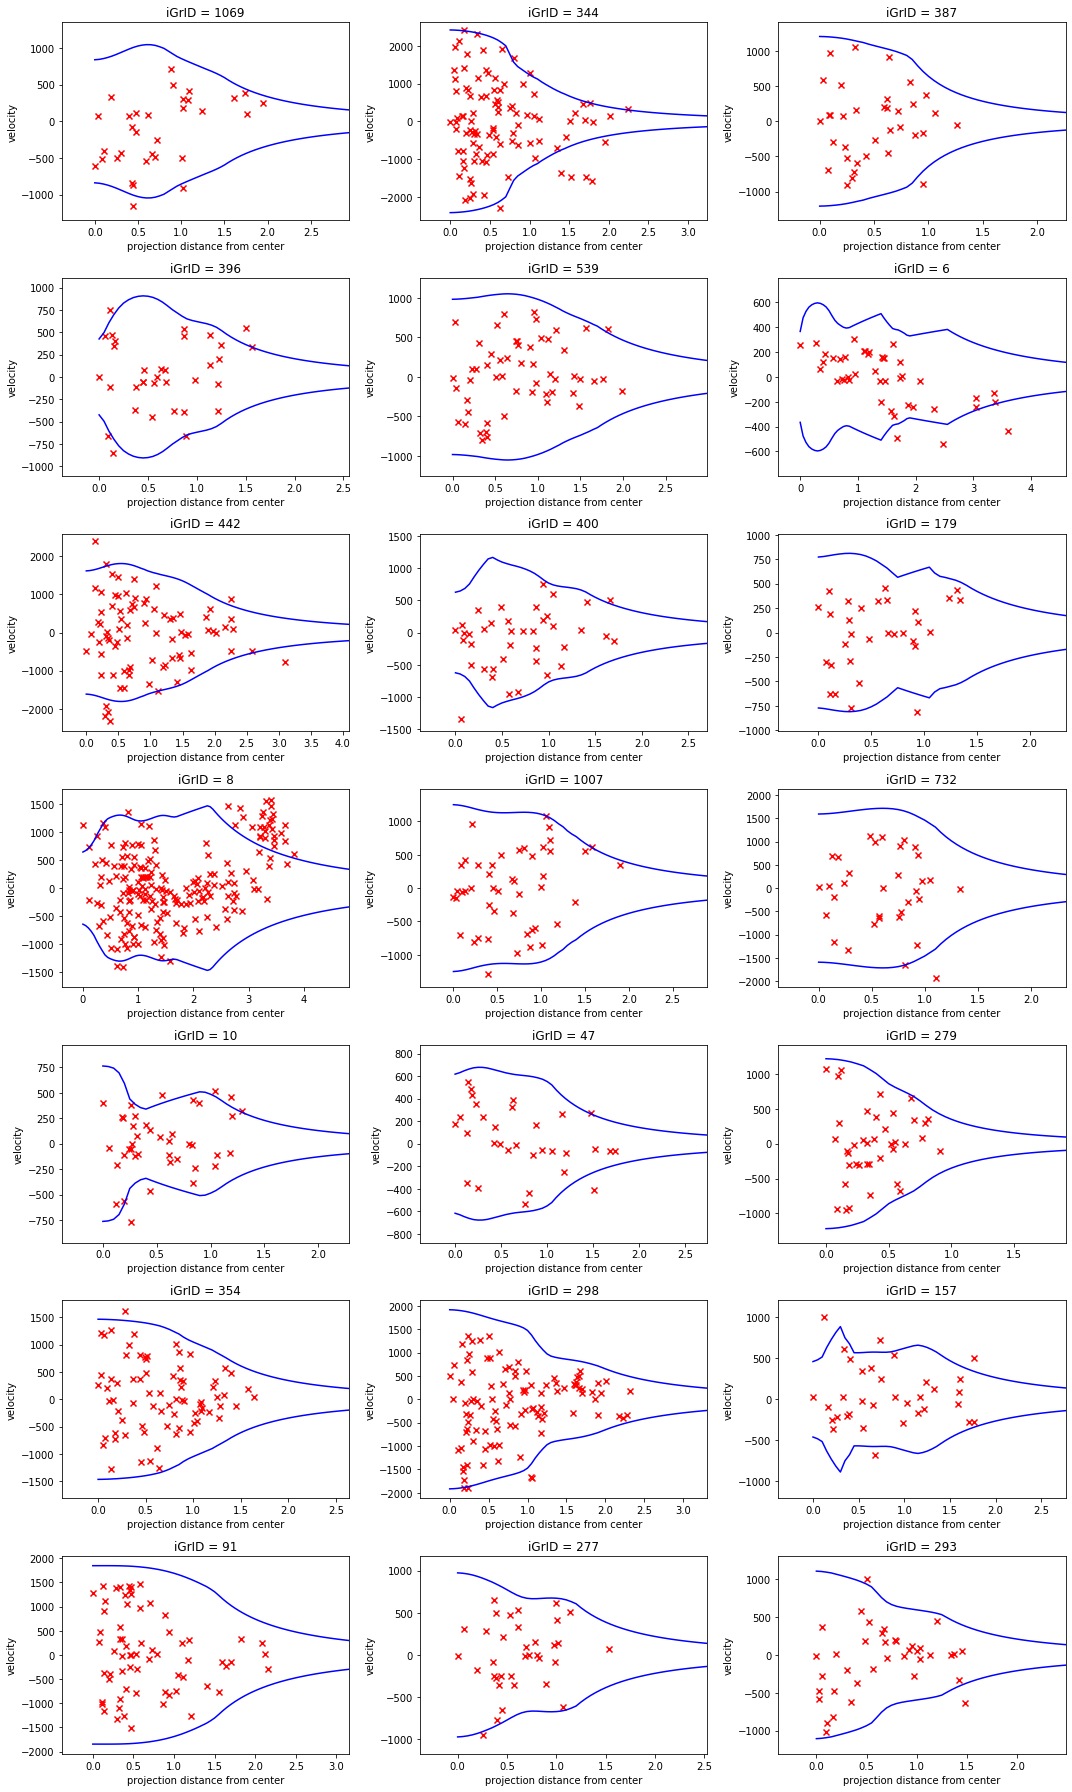

In [19]:
fig, axs = plt.subplots(7, 3, figsize=(15,25))
GrIDs = g_2.iGrID.unique()
for i in range(21):
    drawPlot(g_2, GrIDs[i], axs[i//3, i%3], 'r')
plt.tight_layout()

DATA SET SIZE 141
Pre_r200= 1.2241429771223942
Calculating Density w/Mirrored Data
Vdisp from galaxies= 854.7304546415022
Combined Vdisp= 854.7304546415022
Calculating initial surface
complete
DATA SET SIZE 33
Pre_r200= 0.5892906345180917
Calculating Density w/Mirrored Data
Vdisp from galaxies= 269.3773072017806
Combined Vdisp= 269.3773072017806
Calculating initial surface
complete
DATA SET SIZE 41
Pre_r200= 0.6864990928036363
Calculating Density w/Mirrored Data
Vdisp from galaxies= 429.54189237754906
Combined Vdisp= 429.54189237754906
Calculating initial surface
complete
DATA SET SIZE 32
Pre_r200= 0.6650535743863835
Calculating Density w/Mirrored Data
Vdisp from galaxies= 291.16434698122333
Combined Vdisp= 291.16434698122333
Calculating initial surface
complete
DATA SET SIZE 39
Pre_r200= 0.6647104777105363
Calculating Density w/Mirrored Data
Vdisp from galaxies= 502.49180555155084
Combined Vdisp= 502.49180555155084
Calculating initial surface
complete
DATA SET SIZE 32
Pre_r200= 0.5422

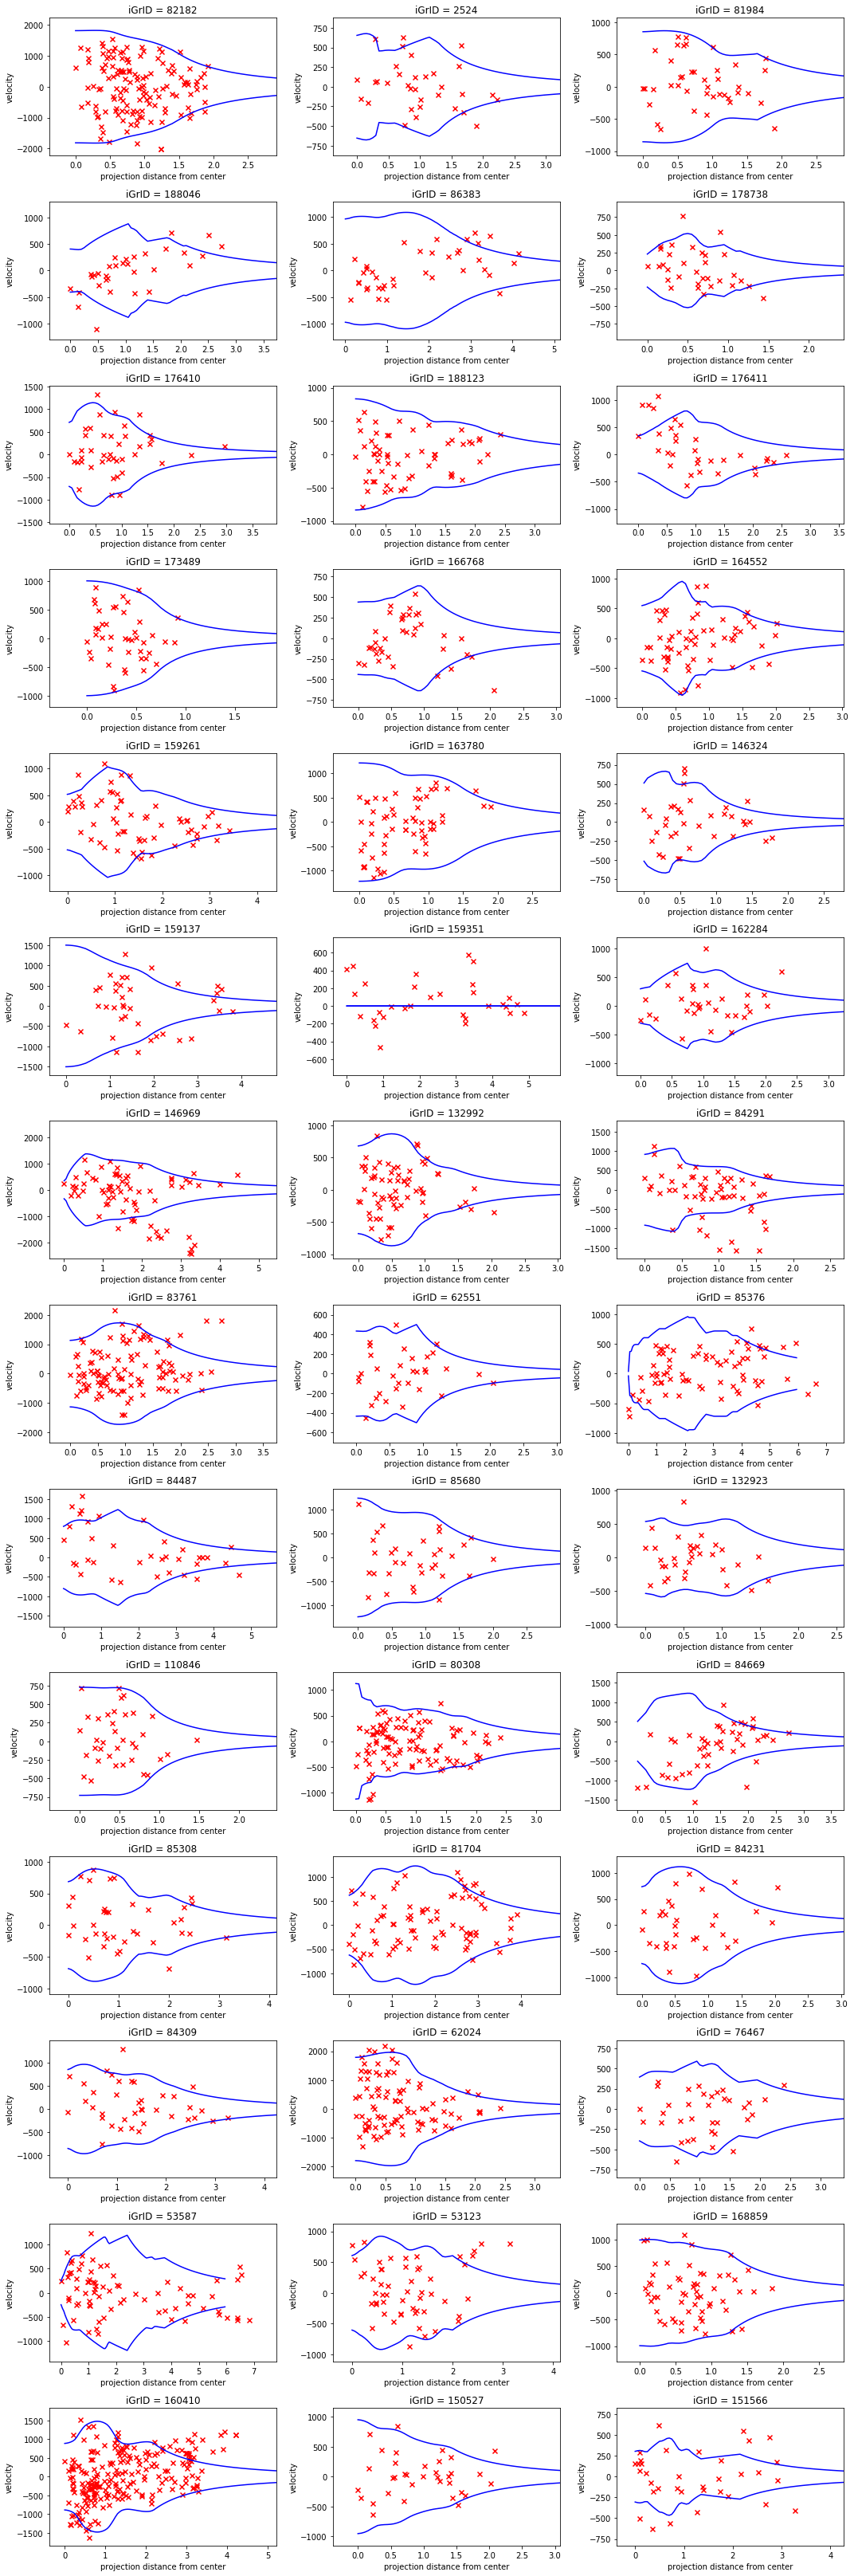

In [20]:
fig, axs = plt.subplots(14, 3, figsize=(15,45))
GrIDs = g_s.iGrID.unique()
for i in range(14*3):
    drawPlot(g_s, GrIDs[i], axs[i//3, i%3], 'r')
plt.tight_layout()

In [21]:
g_2.to_csv('g_2_with_dist.csv', index=False)
g_s.to_csv('g_s_with_dist.csv', index=False)